#### Libraries

In [191]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn
from ast import literal_eval

In [192]:
data = pd.read_csv('2B_data-output.csv', index_col=0, converters={'production_companies': literal_eval}, parse_dates=['release_date'])

In [193]:
data.head(6)

,id,release,release_date,opening_revenue,genre_ids,budget,genres,origin_country,production_companies,production_countries,...,director_rating_max,writer_xp_median,writer_xp_sum,writer_rating_median,writer_rating_max,production_room,writers_room,sound_room,crew,based_on_novel
0,59,A History of Violence,2005-09-23,364000.0,"[18, 53, 80]",32000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",['US'],"[{'id': 12, 'logo_path': '/2ycs64eqV5rqKYHyQK0...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",...,7.411,3.5,7.0,4.7000,5.800,13.0,3.0,18.0,73.0,0.0
1,8976,A Lot Like Love,2005-04-21,7576593.0,"[35, 18, 10749]",30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",['US'],"[{'id': 2977, 'logo_path': None, 'name': 'Kevi...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.532,0.0,0.0,0.0000,0.000,5.0,1.0,13.0,36.0,0.0
2,10077,A Sound of Thunder,2005-05-15,917398.0,"[53, 878, 12, 28]",80000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...","['GB', 'US']","[{'id': 1403, 'logo_path': '/pMTQNUhHCwr39CsS7...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",...,7.500,6.0,62.0,5.9565,10.000,31.0,4.0,16.0,133.0,0.0
3,8202,Æon Flux,2005-11-30,12661112.0,"[878, 28, 53]",62000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",['US'],"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,6.300,4.0,17.0,6.6000,10.000,33.0,3.0,21.0,187.0,0.0
4,22559,Aliens of the Deep,2005-01-28,479368.0,[99],0,"[{'id': 99, 'name': 'Documentary'}]",['US'],"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,8.100,7.0,7.0,6.9000,7.900,5.0,1.0,1.0,13.0,0.0
5,12142,Alone in the Dark,2005-01-28,2834421.0,"[28, 14, 27]",20000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",['US'],"[{'id': 1062, 'logo_path': None, 'name': 'Boll...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",...,4.800,1.0,2.0,4.5355,5.971,24.0,3.0,15.0,143.0,0.0


#### Release Date

<Axes: xlabel='release_date', ylabel='opening_revenue'>

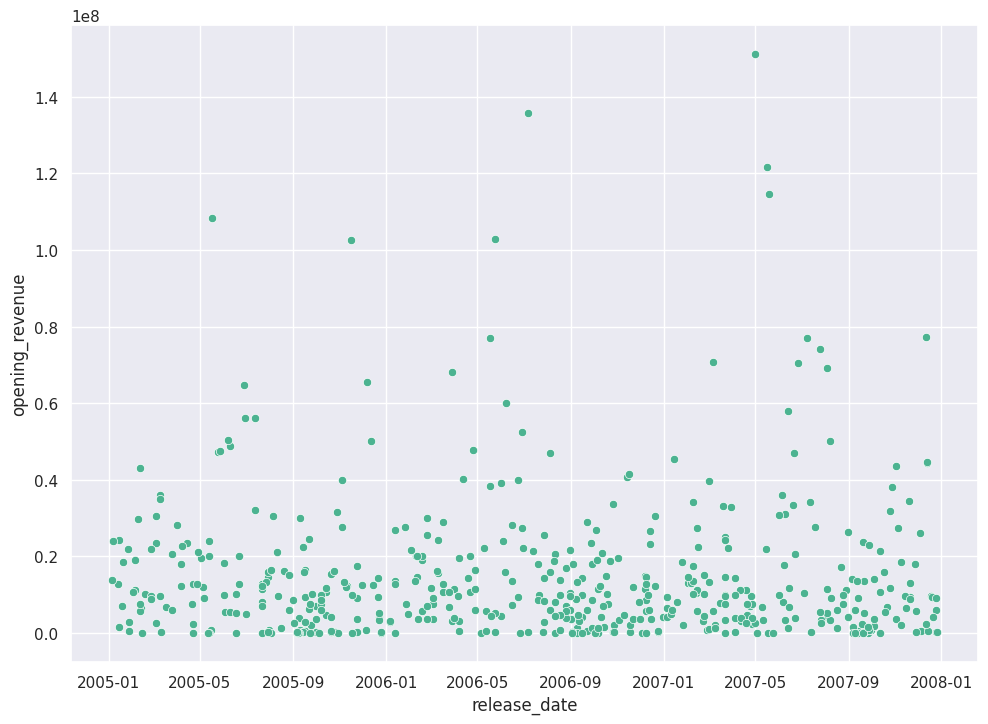

In [194]:
sns.set_theme(style="ticks")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

x = "release_date"
y = "opening_revenue"
data = data

sns.scatterplot(x=x, y=y, data=data,  color="#4CB391")

In [195]:
data['release_month'] = data.release_date.dt.month

<Axes: xlabel='release_month', ylabel='opening_revenue'>

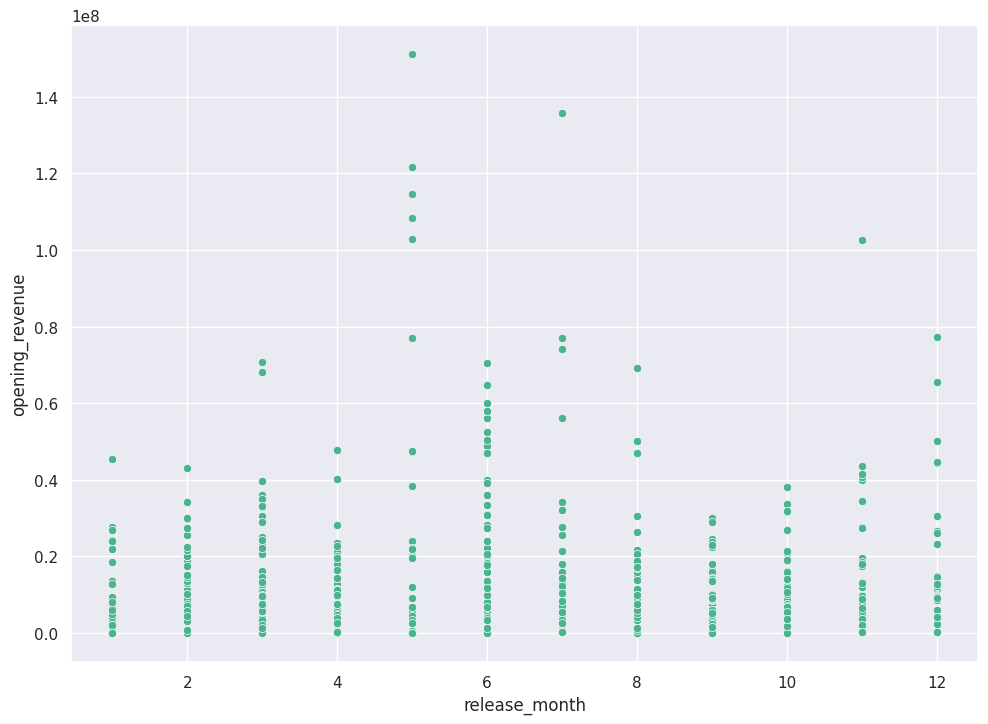

In [196]:
sns.set_theme(style="ticks")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

x = "release_month"
y = "opening_revenue"
data = data

sns.scatterplot(x=x, y=y, data=data,  color="#4CB391")

In [197]:
#Seasonal
data['is_spring'] = data['release_date'].dt.month.between(3, 4).astype(int)
data['is_summer'] = data['release_date'].dt.month.between(5, 8).astype(int)
data['is_fall'] = data['release_date'].dt.month.between(9, 10).astype(int)
data['is_holiday'] = data['release_date'].dt.month.between(11, 12).astype(int)

In [198]:
#Months
data = pd.get_dummies(data, columns =['release_month'], dtype=np.int64)

data = data.rename(columns = {'release_month_1' : 'is_jan',
                              'release_month_2' : 'is_feb',
                              'release_month_3' : 'is_mar',
                              'release_month_4' : 'is_apr',
                              'release_month_5' : 'is_may',
                              'release_month_6' : 'is_jun',
                              'release_month_7' : 'is_jul',
                              'release_month_8' : 'is_aug',
                              'release_month_9' : 'is_sep',
                              'release_month_10' : 'is_oct',
                              'release_month_11' : 'is_nov',
                              'release_month_12' : 'is_dec'})

#### Genre

In [199]:
test = data.genre_ids.to_list()
clean = []
for i in test:
    a = eval(i)
    clean.append(a)

In [200]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabelbinarizer = MultiLabelBinarizer()
multilabel_encoded_results = multilabelbinarizer.fit_transform(clean)
multilabelbinarizer.classes_

array([   12,    14,    16,    18,    27,    28,    35,    36,    37,
          53,    80,    99,   878,  9648, 10402, 10749, 10751, 10752])

In [201]:
df_multilabel_data = pd.DataFrame(multilabel_encoded_results, columns=multilabelbinarizer.classes_)

In [202]:
baseline = pd.merge(data, df_multilabel_data, left_index = True, right_index = True, how = 'inner')

In [203]:
baseline = baseline.rename(columns = {12 : 'is_adventure',
                                      14 : 'is_fantasy',
                                      16 : 'is_animation',
                                      18 : 'is_drama',
                                      27 : 'is_horror',
                                      28 : 'is_action',
                                      35 : 'is_comedy',
                                      36 : 'is_history',
                                      37 : 'is_western',
                                      53 : 'is_thriller',
                                      80 : 'is_crime',
                                      99 : 'is_documentary',
                                      878 : 'is_sci_fi',
                                      9648 : 'is_mystery',
                                      10402 : 'is_music',
                                      10749 : 'is_romance',
                                      10751 : 'is_family'})

In [204]:
baseline = baseline.drop(columns = ['genre_ids', 10752, 'genres'])

In [205]:
baseline

,id,release,release_date,opening_revenue,budget,origin_country,production_companies,production_countries,runtime,belongs_to_collection.id,...,is_history,is_western,is_thriller,is_crime,is_documentary,is_sci_fi,is_mystery,is_music,is_romance,is_family
0,59,A History of Violence,2005-09-23,364000.0,32000000,['US'],"[{'id': 12, 'logo_path': '/2ycs64eqV5rqKYHyQK0...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",96,NaN,...,0,0,1,1,0,0,0,0,0,0
1,8976,A Lot Like Love,2005-04-21,7576593.0,30000000,['US'],"[{'id': 2977, 'logo_path': None, 'name': 'Kevi...","[{'iso_3166_1': 'US', 'name': 'United States o...",107,NaN,...,0,0,0,0,0,0,0,0,1,0
2,10077,A Sound of Thunder,2005-05-15,917398.0,80000000,"['GB', 'US']","[{'id': 1403, 'logo_path': '/pMTQNUhHCwr39CsS7...","[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",101,NaN,...,0,0,1,0,0,1,0,0,0,0
3,8202,Æon Flux,2005-11-30,12661112.0,62000000,['US'],"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",93,NaN,...,0,0,1,0,0,1,0,0,0,0
4,22559,Aliens of the Deep,2005-01-28,479368.0,0,['US'],"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",95,NaN,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2274,The Seeker: The Dark Is Rising,2007-10-05,3745315.0,45000000,['US'],"[{'id': 2527, 'logo_path': '/osO7TGmlRMistSQ5J...","[{'iso_3166_1': 'US', 'name': 'United States o...",94,NaN,...,0,0,1,1,0,0,0,0,0,0
509,35,The Simpsons Movie,2007-07-25,74036787.0,75000000,['US'],"[{'id': 18, 'logo_path': '/uqhagSwM7NAkQWVCQhK...","[{'iso_3166_1': 'US', 'name': 'United States o...",87,NaN,...,0,0,0,0,0,0,0,0,0,0
510,14624,The Ultimate Gift,2007-03-09,1200000.0,0,['US'],"[{'id': 3914, 'logo_path': None, 'name': 'The ...","[{'iso_3166_1': 'US', 'name': 'United States o...",114,269190.0,...,0,0,0,0,0,0,0,0,0,0
511,54318,The Water Horse,2007-12-25,9186054.0,40000000,"['US', 'NZ', 'GB']","[{'id': 497, 'logo_path': '/wmxHM7w6JxbPwaopC6...","[{'iso_3166_1': 'US', 'name': 'United States o...",112,NaN,...,0,0,0,0,0,0,0,0,0,0


#### Production

In [206]:
baseline.columns

Index(['id', 'release', 'release_date', 'opening_revenue', 'budget',
       'origin_country', 'production_companies', 'production_countries',
       'runtime', 'belongs_to_collection.id', 'belongs_to_collection.name',
       'position_in_series', 'previous_film_release', 'previous_film_rating',
       'cast_xp_median', 'cast_xp_sum', 'cast_rating_max', 'director_xp',
       'director_rating_median', 'director_rating_max', 'writer_xp_median',
       'writer_xp_sum', 'writer_rating_median', 'writer_rating_max',
       'production_room', 'writers_room', 'sound_room', 'crew',
       'based_on_novel', 'is_spring', 'is_summer', 'is_fall', 'is_holiday',
       'is_jan', 'is_feb', 'is_mar', 'is_apr', 'is_may', 'is_jun', 'is_jul',
       'is_aug', 'is_sep', 'is_oct', 'is_nov', 'is_dec', 'is_adventure',
       'is_fantasy', 'is_animation', 'is_drama', 'is_horror', 'is_action',
       'is_comedy', 'is_history', 'is_western', 'is_thriller', 'is_crime',
       'is_documentary', 'is_sci_fi', 'is_mys

In [207]:
baseline['num_production_companies'] = baseline['production_companies'].str.len()

In [208]:
baseline['is_series'] = baseline['position_in_series'].gt(1).astype(int)
baseline = baseline.drop(columns = ['belongs_to_collection.id', 'belongs_to_collection.name'])

In [209]:
#### Add Indie Code

In [210]:
baseline.columns

Index(['id', 'release', 'release_date', 'opening_revenue', 'budget',
       'origin_country', 'production_companies', 'production_countries',
       'runtime', 'position_in_series', 'previous_film_release',
       'previous_film_rating', 'cast_xp_median', 'cast_xp_sum',
       'cast_rating_max', 'director_xp', 'director_rating_median',
       'director_rating_max', 'writer_xp_median', 'writer_xp_sum',
       'writer_rating_median', 'writer_rating_max', 'production_room',
       'writers_room', 'sound_room', 'crew', 'based_on_novel', 'is_spring',
       'is_summer', 'is_fall', 'is_holiday', 'is_jan', 'is_feb', 'is_mar',
       'is_apr', 'is_may', 'is_jun', 'is_jul', 'is_aug', 'is_sep', 'is_oct',
       'is_nov', 'is_dec', 'is_adventure', 'is_fantasy', 'is_animation',
       'is_drama', 'is_horror', 'is_action', 'is_comedy', 'is_history',
       'is_western', 'is_thriller', 'is_crime', 'is_documentary', 'is_sci_fi',
       'is_mystery', 'is_music', 'is_romance', 'is_family',
       'num_

#### Interactions

In [211]:
# months = ['is_jan', 'is_feb', 'is_mar',
#        'is_apr', 'is_may', 'is_jun', 'is_jul', 'is_aug', 'is_sep', 'is_oct',
#        'is_nov', 'is_dec']

# genres = ['is_adventure', 'is_fantasy', 'is_animation',
#        'is_drama', 'is_horror', 'is_action', 'is_comedy', 'is_history',
#        'is_western', 'is_thriller', 'is_crime', 'is_documentary', 'is_sci_fi',
#        'is_mystery', 'is_music', 'is_romance', 'is_family',]

In [212]:
# import warnings
# warnings.filterwarnings("ignore")

# for i in months:
#     for j in genres:
#         new_column = f'{i}_*_{j}'
#         baseline[new_column] = baseline[str(i)] * baseline[str(j)]

In [213]:
# for i in genres:
#     for j in genres:
#         if i == j:
#             continue
#         if f'{j}_*_{i}' in baseline:
#             continue
#         else:
#             new_column = f'{i}_*_{j}'
#             baseline[new_column] = baseline[str(i)] * baseline[str(j)]

In [214]:
baseline.to_csv('./3A_data-output.csv')